In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('us_housing.xlsx')

In [3]:
data

,Price,House Price Index,Personal Income
0,200300,100.000,8382.6
1,199200,100.571,8443.7
2,204900,101.466,8503.7
3,207300,102.541,8542.9
4,200000,103.702,8580.9
...,...,...,...
260,470600,271.498,20909.7
261,487700,273.712,21073.0
262,498800,276.085,21176.6
263,491000,278.660,21236.8


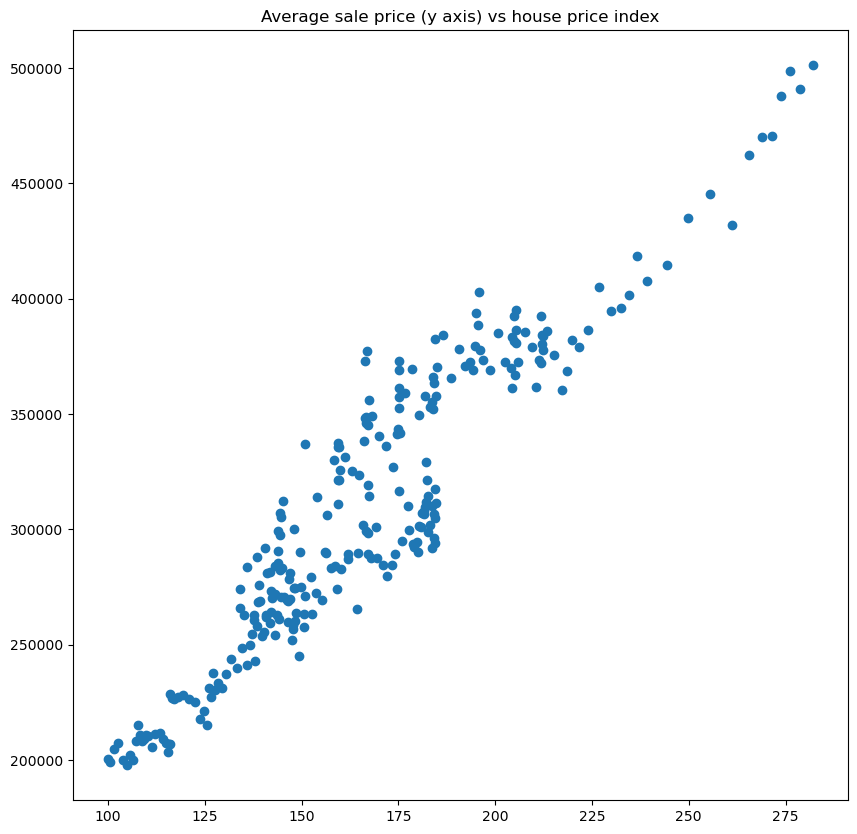

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
fig1 = plt.subplot()
plt.scatter(data.loc[:,'House Price Index'],data.loc[:,'Price'])
plt.title("Average sale price (y axis) vs house price index")
plt.show()

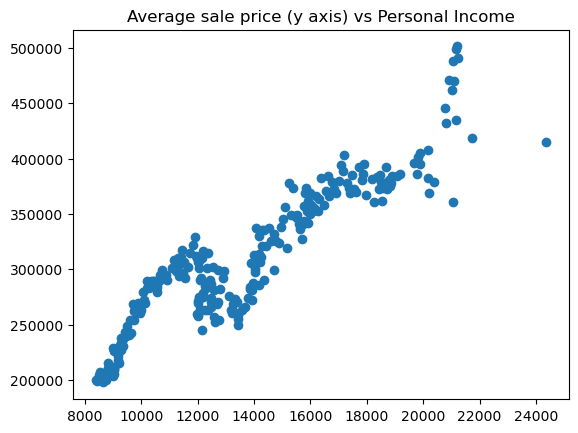

In [5]:
fig2 = plt.subplot()
plt.scatter(data.loc[:,'Personal Income'],data.loc[:,'Price'])
plt.title("Average sale price (y axis) vs Personal Income")
plt.show()

In [6]:
x = data.loc[:,'House Price Index']
y = data.loc[:,'Price']
y.head()

0    200300
1    199200
2    204900
3    207300
4    200000
Name: Price, dtype: int64

In [8]:
x = np.array(x).reshape(-1,1)
from sklearn.linear_model import LinearRegression

In [11]:
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [12]:
coef = LR.coef_
intercept = LR.intercept_
print(coef,intercept)

[1639.09365559] 35706.205393276934


In [14]:
y_predic1 = LR.predict(x)
print(y_predic1)

[199615.57095252 200551.49342987 202018.48225162 203780.50793138
 205683.49566553 207573.37065042 208994.46484982 210305.7397743
 211310.50418517 212282.48672294 213205.29645104 214024.84327884
 214718.17989515 215419.71197975 216652.31040875 218050.45729697
 219617.43083172 221369.62194955 222933.31729698 224182.30666254
 224964.15433626 225318.19856587 225575.5362698  225932.85868672
 226557.3533695  227344.11832418 229002.88110364 231099.28188914
 233689.04986498 236221.44956287 238442.4214662  240150.35705532
 241402.6246082  242454.92273509 243284.30412482 244116.96370186
 244939.78871697 246046.17693449 247655.76690428 249588.25832423
 251802.67385293 254074.45765958 256405.24883783 258565.57427591
 260386.60732727 261861.7916173  263156.67560522 264569.57433634
 266336.51729707 268506.67729707 271868.45838469 275308.91596778
 278839.52370193 282419.30424574 285400.81560527 287821.75693458
 289942.74412491 291893.26557507 293856.89977447 295781.19572613
 298174.2724633  301114.80

In [15]:

from sklearn.metrics import mean_squared_error,r2_score
MSE = mean_squared_error(y,y_predic1)
R2 = r2_score(y,y_predic1)
print(MSE,R2)

490396141.02107185 0.8825506636334525


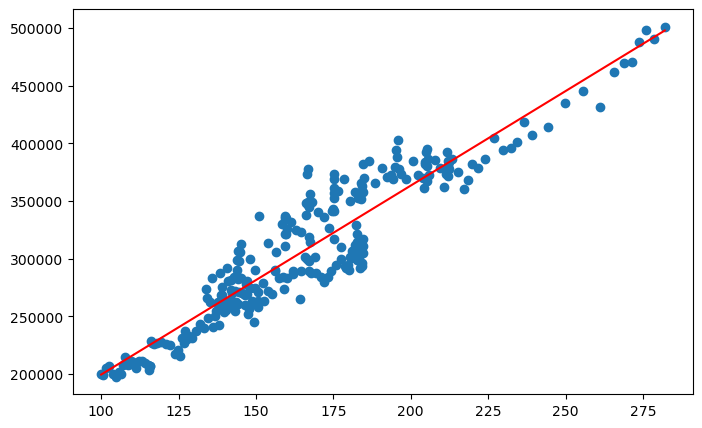

In [18]:
fig3=plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.plot(x,y_predic1,'r')
plt.show()

In [20]:
x_mul = data.drop(['Price'],axis=1)
x_mul

,House Price Index,Personal Income
0,100.000,8382.6
1,100.571,8443.7
2,101.466,8503.7
3,102.541,8542.9
4,103.702,8580.9
...,...,...
260,271.498,20909.7
261,273.712,21073.0
262,276.085,21176.6
263,278.660,21236.8


In [21]:
LR_mul = LinearRegression()
LR_mul.fit(x_mul,y)

LinearRegression()

In [22]:
y_predict_mul = LR_mul.predict(x_mul)
y_predict_mul

array([201962.90363353, 203006.15945289, 204352.16631168, 205703.12920423,
       207127.11002927, 208667.10537033, 210042.77902812, 211185.82736062,
       212136.87802676, 212977.32421925, 213652.26798052, 214397.60055304,
       215620.30623519, 216317.40684489, 217285.72471041, 218046.3646538 ,
       218940.03644507, 219986.87002393, 220865.68114263, 221481.38345427,
       221727.54351911, 222037.99391121, 222169.60175843, 222415.67408477,
       222968.1142033 , 223553.52023034, 224677.3223861 , 226309.40496835,
       228085.46923379, 229849.69920543, 231098.85671962, 232253.132028  ,
       233175.58465036, 234070.43939451, 234790.81794906, 235496.94906822,
       235955.5499725 , 236643.62158216, 237909.17355739, 239270.42070684,
       241072.01903508, 242755.27372985, 244423.83359541, 246078.0664113 ,
       247503.27591563, 248677.01779026, 249984.28753345, 251013.94014202,
       252198.79990025, 253743.18004995, 256124.29308117, 258549.95865211,
       261312.33100742, 2

In [24]:
MSE = mean_squared_error(y,y_predict_mul)
R2 = r2_score(y,y_predict_mul)
print(MSE,R2)

274427256.27202284 0.9342749739773001


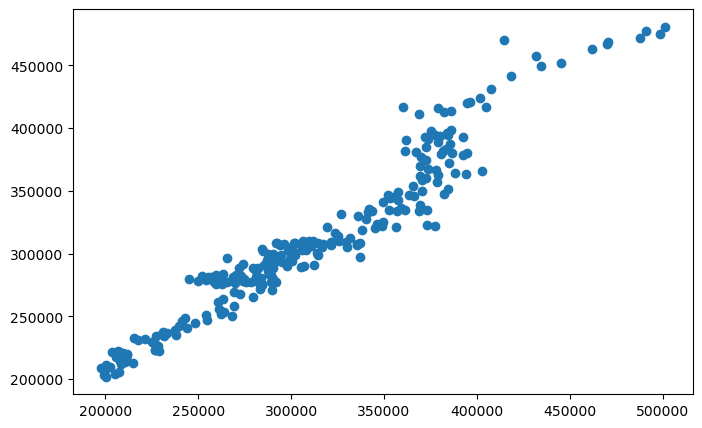

In [25]:
fig4 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_mul)
plt.show()

In [27]:
x_test = [300, 22000]
x_test = np.array(x_test).reshape(1,-1)
print(x_test)

[[  300 22000]]


In [34]:
y_test_predi = LR_mul.predict(x_test)
print(y_test_predi)

[504441.12631113]


/Users/zhanghao/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
